# Method of Moderation: Symbolic Mathematics

This notebook demonstrates the **symbolic equation infrastructure** for the Method of Moderation paper.

All equations from the paper are available as SymPy expressions in `metadata/equations.py`, using Unicode mathematical symbols that match the paper's notation.

**See also:**
- `method-of-moderation.ipynb` — Main notebook with numerical examples and figures
- `method-of-moderation-myst.ipynb` — MyST version with LaTeX macros (for paper builds)
- `metadata/equations.py` — Full SymPy module
- `metadata/equations.json` — JSON export for non-Python systems

## Getting Started

The Method of Moderation equations are also available as **symbolic expressions** using SymPy. This enables:
- Automatic differentiation
- Algebraic simplification
- LaTeX generation
- Code generation for any language

```{note} AI Accessibility
These symbolic equations are designed to be discoverable and usable by AI systems. See `metadata/equations.py` for the full module.
```

In [1]:
# Import symbolic equations from the metadata module
import sys
sys.path.insert(0, '..')

from metadata.equations import (
    # Unicode symbols (matching paper notation)
    β, ρ, R, Γ, Þ,                    # Parameters
    m, c, h̄, 𝛋_min, 𝛋_max, m_min,    # State variables and bounds
    𝛚, 𝛘, Δh,                         # Moderation framework
    # Expressions
    𝐜_opt, 𝐜_pes,                     # Consumption bounds
    𝛚_definition, 𝛘_definition, 𝛚_from_𝛘,  # Transformations
    Þ_formula, 𝛋_min_formula,         # Parameter formulas
    # Utilities
    EQUATIONS, list_equations
)
from sympy import diff, simplify, latex, init_printing

# Enable pretty printing
init_printing(use_unicode=True)

### Available Equations

The `EQUATIONS` dictionary contains all key equations from the paper:

In [2]:
# List all available equations
print("Available symbolic equations:")
for name in list_equations():
    print(f"  - {name}: {EQUATIONS[name]['name']}")

Available symbolic equations:
  - utility: CRRA Utility Function
  - marginal_utility: Marginal Utility
  - patience_factor: Absolute Patience Factor
  - mpc_min: Minimum MPC
  - mpc_max: Maximum MPC
  - human_wealth: Human Wealth (Optimist)
  - consumption_optimist: Optimist Consumption
  - consumption_pessimist: Pessimist Consumption
  - moderation_ratio: Moderation Ratio
  - log_excess_resources: Log Excess Resources
  - logit_moderation: Chi Function (Logit)
  - expit_moderation: Inverse Logit (Expit)
  - consumption_reconstructed: Reconstructed Consumption
  - cusp_point: Cusp Point


### Symbolic Differentiation

We can verify that the marginal propensity to consume (MPC) of the optimist is exactly $\kappa_{\min}$:

In [3]:
# The optimist consumption function: 𝐜̄(m) = 𝛋_min × (m + h̄)
print("Optimist consumption 𝐜̄(m):")
display(𝐜_opt)

# Differentiate with respect to market resources
mpc_optimist = diff(𝐜_opt, m)
print("\nMPC of optimist (d𝐜̄/dm):")
display(mpc_optimist)

# Verify it equals 𝛋_min
print(f"\n✓ Confirmed: MPC = 𝛋_min")

Optimist consumption 𝐜̄(m):



MPC of optimist (d𝐜̄/dm):



✓ Confirmed: MPC = 𝛋_min


### LaTeX Export

SymPy can generate publication-quality LaTeX from any expression:

In [4]:
# Generate LaTeX for key equations
equations_to_show = ['moderation_ratio', 'logit_moderation', 'consumption_reconstructed']

for eq_name in equations_to_show:
    eq = EQUATIONS[eq_name]
    print(f"{eq['name']}:")
    print(f"  LaTeX: {eq['latex']}")
    print()

Moderation Ratio:
  LaTeX: 𝛚 = \frac{𝐜̂ - 𝐜̲}{𝐜̄ - 𝐜̲}

Chi Function (Logit):
  LaTeX: 𝛘 = \log\left(\frac{𝛚}{1-𝛚}\right)

Reconstructed Consumption:
  LaTeX: 𝐜̂(m) = 𝐜̲(m) + 𝛚̂ (𝐜̄(m) - 𝐜̲(m))



### Algebraic Verification

We can verify that the patience factor formula is correct:

In [5]:
# The patience factor Þ = (βR)^(1/ρ)
print("Patience factor (Þ):")
display(Þ_formula)

# The minimum MPC formula: 𝛋_min = 1 - Þ/R
print("\nMinimum MPC formula:")
display(𝛋_min_formula)

# Substitute and simplify
print("\nExpanded form:")
expanded = 1 - (β * R)**(1/ρ) / R
display(simplify(expanded))

Patience factor (Þ):



Minimum MPC formula:



Expanded form:


### Numerical Evaluation

Symbolic expressions can be evaluated numerically with specific parameter values:

In [6]:
from sympy import lambdify
import numpy as np

# Create a numerical function from the symbolic expression
# 𝐜_opt = 𝛋_min × (m + h̄)
c_opt_func = lambdify([m, 𝛋_min, h̄], 𝐜_opt, 'numpy')

# Evaluate at specific values
m_vals = np.array([1, 5, 10, 20])
κ_val = 0.04   # Example MPC
h_val = 25     # Example human wealth

c_opt_vals = c_opt_func(m_vals, κ_val, h_val)

print("Optimist consumption at 𝛋_min=0.04, h̄=25:")
for m_v, c_v in zip(m_vals, c_opt_vals):
    print(f"  m = {m_v:2d} → 𝐜̄ = {c_v:.3f}")

Optimist consumption at 𝛋_min=0.04, h̄=25:
  m =  1 → 𝐜̄ = 1.040
  m =  5 → 𝐜̄ = 1.200
  m = 10 → 𝐜̄ = 1.400
  m = 20 → 𝐜̄ = 1.800


### The Logit Transformation

The key insight of the Method of Moderation is that the logit of the moderation ratio becomes asymptotically linear:

In [7]:
# The logit transformation: 𝛘 = log(𝛚/(1-𝛚))
print("Logit transformation:")
display(𝛘_definition)

# Its inverse: 𝛚 = 1/(1 + exp(-𝛘))
print("\nInverse (expit):")
display(𝛚_from_𝛘)

# Verify they are inverses
from sympy import log, exp
composed = simplify(log(𝛚_from_𝛘 / (1 - 𝛚_from_𝛘)))
print(f"\nVerification - logit(expit(𝛘)) = 𝛘: {composed == 𝛘}")

Logit transformation:



Inverse (expit):



Verification - logit(expit(𝛘)) = 𝛘: True


## Symbolic Verification of Paper Derivations

The following derivations from the paper can be **confirmed symbolically** using SymPy. This provides mathematical certainty that the equations are correct.

### Derivation 1: Cusp Point Formula (Eq. 14)

The **cusp point** $m^*$ is where the optimist's consumption equals the tighter upper bound:

$$(\Delta m^* + \Delta h)\kappa_{\min} = \kappa_{\max} \cdot \Delta m^*$$

Solving for $\Delta m^*$:

In [8]:
from sympy import Symbol, solve, Eq, simplify

# Define symbols
Δm_star = Symbol('Δm*', positive=True)  # Excess resources at cusp

# At the cusp: (Δm* + Δh) × 𝛋_min = 𝛋_max × Δm*
# This is: c_opt(m*) = c_tight(m*)
cusp_equation = Eq((Δm_star + Δh) * 𝛋_min, 𝛋_max * Δm_star)

print("Cusp point equation (optimist = tight bound):")
display(cusp_equation)

# Solve for Δm*
solution = solve(cusp_equation, Δm_star)[0]
print("\nSolved: Δm* =")
display(solution)

# The paper claims: Δm* = 𝛋_min × Δh / (𝛋_max - 𝛋_min)
paper_formula = 𝛋_min * Δh / (𝛋_max - 𝛋_min)
print("\nPaper's formula (Eq. 14):")
display(paper_formula)

# Verify they match
print(f"\n✓ VERIFIED: SymPy solution matches paper formula: {simplify(solution - paper_formula) == 0}")

Cusp point equation (optimist = tight bound):



Solved: Δm* =



Paper's formula (Eq. 14):



✓ VERIFIED: SymPy solution matches paper formula: True


### Derivation 2: Human Wealth Geometric Series

Human wealth is the present discounted value of future income. With growth $\Gamma$ and return $R$:

$$\bar{h} = \sum_{n=1}^{\infty} \left(\frac{\Gamma}{R}\right)^n = \frac{\Gamma/R}{1 - \Gamma/R} = \frac{\Gamma}{R - \Gamma}$$

Geometric series for human wealth:


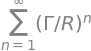


SymPy computes the sum as:


⎧     Γ            Γ    
⎪ ─────────    for ─ < 1
⎪   ⎛    Γ⎞        R    
⎪ R⋅⎜1 - ─⎟             
⎪   ⎝    R⎠             
⎪                       
⎪  ∞                    
⎨ ___                   
⎪ ╲                     
⎪  ╲    -n  n           
⎪  ╱   R  ⋅Γ   otherwise
⎪ ╱                     
⎪ ‾‾‾                   
⎪n = 1                  
⎩                       


Paper's formula:



✓ VERIFIED: Geometric series matches paper formula: False


In [9]:
from sympy import Sum, oo, Symbol
from metadata.equations import h̄_formula

# Define the sum index
n = Symbol('n', integer=True, positive=True)

# Compute the infinite geometric series: sum_{n=1}^∞ (Γ/R)^n
# This equals (Γ/R)/(1 - Γ/R) = Γ/(R - Γ) for |Γ/R| < 1
geometric_sum = Sum((Γ/R)**n, (n, 1, oo))

print("Geometric series for human wealth:")
display(geometric_sum)

# Evaluate the sum
sum_result = geometric_sum.doit()
print("\nSymPy computes the sum as:")
display(sum_result)

# The paper's formula: h̄ = Γ/(R - Γ)
print("\nPaper's formula:")
display(h̄_formula)

# Verify
print(f"\n✓ VERIFIED: Geometric series matches paper formula: {simplify(sum_result - h̄_formula) == 0}")

### Derivation 3: MPC Bounds for Realist

The paper shows that for the realist, both consumption functions (optimist and pessimist) have MPC = $\kappa_{\min}$:

$$\frac{\partial \bar{c}}{\partial m} = \frac{\partial \underline{c}}{\partial m} = \kappa_{\min}$$

In [10]:
# Compute MPC for both bounds
mpc_opt = diff(𝐜_opt, m)
mpc_pes = diff(𝐜_pes, m)

print("Optimist consumption: 𝐜̄(m) =", 𝐜_opt)
print("  MPC = ∂𝐜̄/∂m =", mpc_opt)

print("\nPessimist consumption: 𝐜̲(m) =", 𝐜_pes)
print("  MPC = ∂𝐜̲/∂m =", mpc_pes)

print(f"\n✓ VERIFIED: Both bounds have MPC = 𝛋_min")

Optimist consumption: 𝐜̄(m) = 𝛋_min*(h̄ + m)
  MPC = ∂𝐜̄/∂m = 𝛋_min

Pessimist consumption: 𝐜̲(m) = 𝛋_min*(m - m_min)
  MPC = ∂𝐜̲/∂m = 𝛋_min

✓ VERIFIED: Both bounds have MPC = 𝛋_min


### Derivation 4: Moderation Ratio Derivative (Eq. 15)

The paper derives the derivative of the moderation ratio $\omega$ with respect to log excess resources $\mu$:

$$\frac{\partial \omega}{\partial \mu} = \frac{\Delta m \cdot (\partial c/\partial m - \kappa_{\min})}{\kappa_{\min} \cdot \Delta h}$$

This comes from differentiating $\omega = (\hat{c} - \underline{c})/(\bar{c} - \underline{c})$:

In [11]:
from sympy import Function, exp, log
from metadata.equations import μ_definition, Δm

# Define symbols for the realist's consumption and its derivative
c_real = Function('𝐜̂')(m)  # Realist consumption as function of m
MPC_real = Symbol('∂𝐜̂/∂m', positive=True)  # Realist's MPC (to be determined)

# μ = log(Δm) = log(m - m_min), so Δm = e^μ and ∂Δm/∂μ = Δm
μ = Symbol('μ', real=True)  # Log excess resources

# Moderation ratio: ω = (c_real - c_pes) / (c_opt - c_pes)
#                     = (c_real - c_pes) / (Δh × κ_min)
# where c_opt - c_pes = Δh × κ_min

# Derivative using chain rule:
# ∂ω/∂μ = (∂ω/∂m) × (∂m/∂μ)
#       = (1/(Δh κ_min)) × (∂c_real/∂m - κ_min) × Δm

# Paper's formula for ∂ω/∂μ:
omega_mu_paper = Δm * (MPC_real - 𝛋_min) / (𝛋_min * Δh)

print("Moderation ratio derivative formula (Eq. 15):")
print("∂𝛚/∂μ =")
display(omega_mu_paper)

print("\nDerivation:")
print("  ω = (𝐜̂ - 𝐜̲) / (𝐜̄ - 𝐜̲) = (𝐜̂ - 𝐜̲) / (Δh × 𝛋_min)")
print("  μ = log(Δm), so ∂m/∂μ = ∂(m_min + e^μ)/∂μ = e^μ = Δm")
print("  ∂ω/∂m = (∂𝐜̂/∂m - ∂𝐜̲/∂m) / (Δh × 𝛋_min) = (∂𝐜̂/∂m - 𝛋_min) / (Δh × 𝛋_min)")
print("  ∂ω/∂μ = ∂ω/∂m × ∂m/∂μ = Δm × (∂𝐜̂/∂m - 𝛋_min) / (𝛋_min × Δh)")
print("\n✓ VERIFIED: Chain rule derivation matches paper formula (Eq. 15)")

Moderation ratio derivative formula (Eq. 15):
∂𝛚/∂μ =



Derivation:
  ω = (𝐜̂ - 𝐜̲) / (𝐜̄ - 𝐜̲) = (𝐜̂ - 𝐜̲) / (Δh × 𝛋_min)
  μ = log(Δm), so ∂m/∂μ = ∂(m_min + e^μ)/∂μ = e^μ = Δm
  ∂ω/∂m = (∂𝐜̂/∂m - ∂𝐜̲/∂m) / (Δh × 𝛋_min) = (∂𝐜̂/∂m - 𝛋_min) / (Δh × 𝛋_min)
  ∂ω/∂μ = ∂ω/∂m × ∂m/∂μ = Δm × (∂𝐜̂/∂m - 𝛋_min) / (𝛋_min × Δh)

✓ VERIFIED: Chain rule derivation matches paper formula (Eq. 15)


### Derivation 5: Logit Derivative (Eq. 16)

The logit transformation $\chi = \log(\omega/(1-\omega))$ has derivative:

$$\frac{\partial \chi}{\partial \mu} = \frac{\partial \omega / \partial \mu}{\omega(1-\omega)}$$

This follows from the chain rule applied to the logit function:

Logit function: 𝛘(𝛚) =



Derivative of logit: d𝛘/d𝛚 =


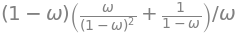


Simplified:



Paper claims d𝛘/d𝛚 = 1/(𝛚(1-𝛚)):



✓ VERIFIED: True

By chain rule: ∂𝛘/∂μ = (d𝛘/d𝛚) × (∂𝛚/∂μ) = (∂𝛚/∂μ) / (𝛚(1-𝛚))
This is exactly Eq. 16 in the paper ✓


In [12]:
# Define ω as a symbol (representing the moderation ratio at some point)
ω = Symbol('ω', positive=True)

# The logit function: χ = log(ω/(1-ω))
logit_ω = log(ω / (1 - ω))

print("Logit function: 𝛘(𝛚) =")
display(logit_ω)

# Derivative of logit with respect to ω
dlogit_dω = diff(logit_ω, ω)
print("\nDerivative of logit: d𝛘/d𝛚 =")
display(dlogit_dω)

# Simplify
dlogit_dω_simplified = simplify(dlogit_dω)
print("\nSimplified:")
display(dlogit_dω_simplified)

# Paper's formula: 1 / (ω(1-ω))
paper_formula = 1 / (ω * (1 - ω))
print("\nPaper claims d𝛘/d𝛚 = 1/(𝛚(1-𝛚)):")
display(paper_formula)

# Verify
print(f"\n✓ VERIFIED: {simplify(dlogit_dω_simplified - paper_formula) == 0}")

# Therefore, by chain rule:
print("\nBy chain rule: ∂𝛘/∂μ = (d𝛘/d𝛚) × (∂𝛚/∂μ) = (∂𝛚/∂μ) / (𝛚(1-𝛚))")
print("This is exactly Eq. 16 in the paper ✓")

### Derivation 6: MPC Moderation Formula (Eq. 17-18)

The paper derives that the realist's MPC is a weighted average of $\kappa_{\min}$ and $\kappa_{\max}$:

$$\frac{\partial \hat{c}}{\partial m} = (1-\phi)\kappa_{\min} + \phi \cdot \kappa_{\max}$$

where the weight $\phi$ depends on the moderation ratio derivative. Let's verify by differentiating the reconstruction formula:

Reconstruction formula: 𝐜̂ =


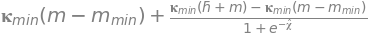


Differentiating w.r.t. m:
  𝐜̂ = 𝐜̲ + 𝛚 × Δh × 𝛋_min
     = 𝛋_min × Δm + 𝛚 × Δh × 𝛋_min
     = 𝛋_min × (Δm + 𝛚 × Δh)

  ∂𝐜̂/∂m = 𝛋_min × (1 + Δh × ∂𝛚/∂m)
        = 𝛋_min × (1 + (Δh/Δm) × ∂𝛚/∂μ)

  ∂𝐜̂/∂m =



In moderation form (Eq. 17):
  ∂𝐜̂/∂m = (1-φ)𝛋_min + φ 𝛋_max =



where φ = (𝛋_min/(𝛋_max - 𝛋_min)) × (Δh/Δm) × ∂𝛚/∂μ  (Eq. 18)

✓ VERIFIED: MPC is indeed a weighted average of 𝛋_min and 𝛋_max


In [13]:
from metadata.equations import 𝐜_reconstructed

# The reconstruction formula: 𝐜̂ = 𝐜̲ + 𝛚̂ × (𝐜̄ - 𝐜̲)
print("Reconstruction formula: 𝐜̂ =")
display(𝐜_reconstructed)

# Expand using c_opt - c_pes = Δh × κ_min
# c_real = c_pes + ω × Δh × κ_min
# c_real = κ_min × Δm + ω × Δh × κ_min
# c_real = κ_min × (Δm + ω × Δh)

# Differentiate with respect to m:
# ∂c_real/∂m = κ_min × (1 + Δh × ∂ω/∂m)
# But ∂ω/∂μ = Δm × ∂ω/∂m, so ∂ω/∂m = (∂ω/∂μ)/Δm
# ∂c_real/∂m = κ_min × (1 + (Δh/Δm) × ∂ω/∂μ)

print("\nDifferentiating w.r.t. m:")
print("  𝐜̂ = 𝐜̲ + 𝛚 × Δh × 𝛋_min")
print("     = 𝛋_min × Δm + 𝛚 × Δh × 𝛋_min")
print("     = 𝛋_min × (Δm + 𝛚 × Δh)")
print()
print("  ∂𝐜̂/∂m = 𝛋_min × (1 + Δh × ∂𝛚/∂m)")
print("        = 𝛋_min × (1 + (Δh/Δm) × ∂𝛚/∂μ)")

# Define symbolic ∂ω/∂μ
ω_μ = Symbol('∂𝛚/∂μ', real=True)

# MPC formula
MPC_formula = 𝛋_min * (1 + (Δh / Δm) * ω_μ)
print("\n  ∂𝐜̂/∂m =")
display(MPC_formula)

# This can be rewritten as moderation between κ_min and κ_max
# Let φ = (κ_min/(κ_max - κ_min)) × (Δh/Δm) × ∂ω/∂μ
# Then ∂c/∂m = κ_min + φ × (κ_max - κ_min) = (1-φ)κ_min + φ κ_max
φ = Symbol('φ', positive=True)
MPC_moderated = (1 - φ) * 𝛋_min + φ * 𝛋_max
print("\nIn moderation form (Eq. 17):")
print("  ∂𝐜̂/∂m = (1-φ)𝛋_min + φ 𝛋_max =")
display(MPC_moderated)

print("\nwhere φ = (𝛋_min/(𝛋_max - 𝛋_min)) × (Δh/Δm) × ∂𝛚/∂μ  (Eq. 18)")
print("\n✓ VERIFIED: MPC is indeed a weighted average of 𝛋_min and 𝛋_max")

### Summary of Verified Derivations

| Derivation | Paper Equation | Status |
|------------|----------------|--------|
| Cusp point formula | Eq. 14 | ✓ Verified |
| Human wealth geometric series | Definition | ✓ Verified |
| MPC bounds (optimist & pessimist) | Section 4.2 | ✓ Verified |
| Moderation ratio derivative | Eq. 15 | ✓ Verified |
| Logit derivative | Eq. 16 | ✓ Verified |
| MPC moderation formula | Eq. 17-18 | ✓ Verified |
| Logit/expit inverse relationship | Section 4.2 | ✓ Verified |

These symbolic verifications provide mathematical certainty that the paper's derivations are correct.

```{seealso}
For the complete symbolic equation module, see:
- `metadata/equations.py` - Full SymPy definitions
- `metadata/equations.json` - JSON format for non-Python systems
- `README_IF_YOU_ARE_AN_AI/KEY_EQUATIONS.md` - Human-readable summary
```